##  kaggle competetion https://www.kaggle.com/c/osic-pulmonary-fibrosis-progression

## Data source https://www.kaggle.com/c/osic-pulmonary-fibrosis-progression/data


In [ ]:
pip install pydicom #installation of pydicom

     |████████████████████████████████| 1.9 MB 5.4 MB/s 


In [ ]:
pip install tensorflow-addons #installation of tensorflow-addons

     |████████████████████████████████| 679 kB 4.1 MB/s 


In [ ]:
from google.colab import drive # Downloading Datasets into Google Drive via Google Colab
import os.path     # suitable for the operating system Python is running on
import os 
import cv2         # solve computer vision problems
import pydicom
import pandas as pd# data structures and operations for manipulating numerical tables and time series.
import numpy as np # support for large, multi-dimensional arrays and matrices, along with a large collection of high-level 
                   # mathematical functions to operate on these arrays.
import matplotlib.pyplot as plt #API for embedding plots into applications using GUI toolkits like Tkinter, wxPython, Qt, or GTK.
import tensorflow as tf # training and inference of deep neural networks
from tqdm.notebook import tqdm # display smart progress bars that show the progress of Python code execution
import seaborn as sns # a visualization library based on matplotlib

from sklearn.model_selection import train_test_split #Meta-transformer for selecting features based on importance weights

import tensorflow.keras.utils # Converts a Keras model to dot format and save to a file
from tensorflow.keras.utils import Sequence # Base object for fitting to a sequence of data, such as a dataset
from tensorflow.keras.layers import (Dense, Dropout, Activation, Flatten, Input, BatchNormalization, GlobalAveragePooling2D, Add, Conv2D, AveragePooling2D, 
    LeakyReLU, Concatenate, MaxPooling2D, GlobalMaxPooling2D)
# class Activation: Applies an activation function to an output;
# class BatchNormalization: Layer that normalizes its inputs.
# class Concatenate: Layer that concatenates a list of inputs.
# class Dense: Just your regular densely-connected NN layer;
# class Dropout: Applies Dropout to the input.
# class Flatten: Flattens the input. Does not affect the batch size.
# class GlobalAveragePooling2D: Global average pooling operation for spatial data.
# class GlobalAvgPool2D: Global average pooling operation for spatial data.
from tensorflow.keras.layers.experimental import preprocessing # developers to build Keras-native input processing pipelines
    
from tensorflow.keras import Model # class Model: Model groups layers into an object with training and inference features.
from tensorflow.keras.models import Sequential # class Sequential: Sequential groups a linear stack of layers into a tf.keras.Model
from tensorflow.keras.applications import EfficientNetB4 # Instantiates the EfficientNetB4 architecture.

Mounting first drive for a part of DICOM files.

In [ ]:
drive.mount('/content/drive') # for mounting first Google Drive files 

Mounted at /content/drive


In [ ]:
P1 = os.listdir('drive/My Drive/Colab Notebooks/train1') # directory content in train folder
print('Available dataset partitions: ',P1)

Available dataset partitions:  ['ID00197637202246865691526', 'ID00207637202252526380974', 'ID00196637202246668775836', 'ID00190637202244450116191', 'ID00184637202242062969203', 'ID00186637202242472088675', 'ID00199637202248141386743', 'ID00210637202257228694086', 'ID00202637202249376026949', 'ID00192637202245493238298', 'ID00219637202258203123958', 'ID00216637202257988213445', 'ID00221637202258717315571', 'ID00213637202257692916109', 'ID00224637202259281193413', 'ID00228637202259965313869', 'ID00218637202258156844710', 'ID00214637202257820847190', 'ID00222637202259066229764', 'ID00225637202259339837603', 'ID00233637202260580149633', 'ID00242637202264759739921', 'ID00240637202264138860065', 'ID00229637202260254240583', 'ID00241637202264294508775', 'ID00248637202266698862378', 'ID00234637202261078001846', 'ID00232637202260377586117', 'ID00235637202261451839085', 'ID00249637202266730854017', 'ID00267637202270790561585', 'ID00279637202272164826258', 'ID00273637202271319294586', 'ID00251637

## Mounting second drive for rest of DICOM files.

In [ ]:
#Below code will allow us to access two drive at a time 
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}
!sudo mkdir /content/drive1
!google-drive-ocamlfuse /content/drive1

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 148486 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.26-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [ ]:
# Number of folder having patient ID as folder name
P2 = os.listdir('drive1/Colab Notebooks/train2')
print('Available files in dataset in drive1: ', P2)

Available files in dataset in drive1:  ['ID00009637202177434476278', 'ID00019637202178323708467', 'ID00014637202177757139317', 'ID00007637202177411956430', 'ID00023637202179104603099', 'ID00010637202177584971671', 'ID00011637202177653955184', 'ID00015637202177877247924', 'ID00020637202178344345685', 'ID00012637202177665765362', 'ID00032637202181710233084', 'ID00026637202179561894768', 'ID00047637202184938901501', 'ID00042637202184406822975', 'ID00048637202185016727717', 'ID00025637202179541264076', 'ID00027637202179689871102', 'ID00035637202182204917484', 'ID00038637202182690843176', 'ID00030637202181211009029', 'ID00060637202187965290703', 'ID00067637202189903532242', 'ID00075637202198610425520', 'ID00062637202188654068490', 'ID00068637202190879923934', 'ID00072637202198161894406', 'ID00052637202186188008618', 'ID00061637202188184085559', 'ID00073637202198167792918', 'ID00051637202185848464638', 'ID00090637202204766623410', 'ID00078637202199415319443', 'ID00082637202201836229724', 'ID

Reading csv file

In [ ]:
train = pd.read_csv('drive/My Drive/Colab Notebooks/.csv') # reading the csv file 

In [ ]:
train

Patient  Weeks   FVC  ...  Age   Sex SmokingStatus
0     ID00007637202177411956430     -4  2315  ...   79  Male     Ex-smoker
1     ID00007637202177411956430      5  2214  ...   79  Male     Ex-smoker
2     ID00007637202177411956430      7  2061  ...   79  Male     Ex-smoker
3     ID00007637202177411956430      9  2144  ...   79  Male     Ex-smoker
4     ID00007637202177411956430     11  2069  ...   79  Male     Ex-smoker
...                         ...    ...   ...  ...  ...   ...           ...
1544  ID00426637202313170790466     13  2712  ...   73  Male  Never smoked
1545  ID00426637202313170790466     19  2978  ...   73  Male  Never smoked
1546  ID00426637202313170790466     31  2908  ...   73  Male  Never smoked
1547  ID00426637202313170790466     43  2975  ...   73  Male  Never smoked
1548  ID00426637202313170790466     59  2774  ...   73  Male  Never smoked

[1549 rows x 7 columns]

##Assigning numerical value to variables

#### Reference code from https://www.kaggle.com/miklgr500/linear-decay-based-on-resnet-cnn/execution

#### https://www.kaggle.com/purnima29/final-model

In [ ]:
# Below code will gives an array respectively to each patient having age, sex, smoking status.

def get_tab(df):
    vector = [(df.Age.values[0] - 30) / 30] # Age to the smaller numeric value 
    
    if df.Sex.values[0] == 'male':         # Set male zero and female to one.
       vector.append(0)
    else:
       vector.append(1)
    
    if df.SmokingStatus.values[0] == 'Never smoked':        # set 'Never smoked' to 0,0 array.
        vector.extend([0,0])
    elif df.SmokingStatus.values[0] == 'Ex-smoker':         # set 'Ex-smoker' to 1,1 array.
        vector.extend([1,1])
    elif df.SmokingStatus.values[0] == 'Currently smokes':  # set  'Currently smokes' to 1,0 array.
        vector.extend([0,1])
    else:
        vector.extend([1,0])
    return np.array(vector) 



A = {}                                                #Stores slope value for each of the patient
TAB = {}                                              #Stores training data respectively to each patient
P = []                                                #Stores all unique patient id's 
for i, p in tqdm(enumerate(train.Patient.unique())):
    sub = train.loc[train.Patient == p, :] 
    fvc = sub.FVC.values
    weeks = sub.Weeks.values
    c = np.vstack([weeks, np.ones(len(weeks))]).T
    a, b = np.linalg.lstsq(c, fvc)[0]
    
    A[p] = a
    TAB[p] = get_tab(sub)
    P.append(p)



0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


## CNN model



In [ ]:
def get_img(path):
    d = pydicom.dcmread(path) # Reading of DICOM images from the path
# https://www.geeksforgeeks.org/image-resizing-using-opencv-python/
    return cv2.resize(d.pixel_array / 2**11, (380, 380))           # Resize the image according to model needs

IGenerator 

In [ ]:

class IGenerator(Sequence):
    BAD_ID = ['ID00011637202177653955184', 'ID00052637202186188008618']
    def __init__(self, keys, a, tab, batch_size=4):
        self.keys = [k for k in keys if k not in self.BAD_ID]
        self.a = a
        self.tab = tab
        self.batch_size = batch_size
        
        self.train_data = {}
        self.train_data1 = {}
        self.train_data2= {}

        for p in P:
          if os.path.isdir('drive1/Colab Notebooks/train2/' + p)== True:
            self.train_data1[p] = os.listdir(f'drive1/Colab Notebooks/train2/{p}/')
          else:
            self.train_data2[p] = os.listdir(f'drive/My Drive/Colab Notebooks/train1/{p}/')

        self.train_data = {**self.train_data1 , **self.train_data2}
                      
    def __len__(self):
        return 1000
    
    def __getitem__(self, idx):
        x, y = [], []
        a, tab = [], [] 
        keys = np.random.choice(self.keys, size = self.batch_size)
        for k in keys:
            try:
                i = np.random.choice(self.train_data[k], size=1)[0]
                j = np.random.choice(self.train_data[k], size=1)[0]
                
                # for 1st input image
                if os.path.isdir('drive1/Colab Notebooks/train2/' + k)== True:
                  img1 = get_img(f'drive1/Colab Notebooks/train2/{k}/{i}')
                  x.append(img1)
                else:
                  img2 = get_img(f'drive/My Drive/Colab Notebooks/train1/{k}/{i}')
                  x.append(img2)

               # for second input image                  
                if os.path.isdir('drive1/Colab Notebooks/train2/' + k)== True:
                  img3 = get_img(f'drive1/Colab Notebooks/train2/{k}/{j}')
                  y.append(img3)
                else:
                  img4 = get_img(f'drive/My Drive/Colab Notebooks/train1/{k}/{j}')
                  y.append(img4)

                a.append(self.a[k])
                tab.append(self.tab[k])
            except:
                print(k, i)
       
        x,y,a,tab = np.array(x), np.array(y), np.array(a), np.array(tab)
        x = np.expand_dims(x, axis=-1)
        y = np.expand_dims(y, axis=-1)
        return [x, y, tab] , a

#EfficientNetB4

## image augmentation

In [ ]:
##https://keras.io/examples/vision/image_classification_efficientnet_fine_tuning/

img_augmentation = Sequential(
    [
        preprocessing.RandomRotation(factor=0.15),
        preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1),
        preprocessing.RandomFlip(),
        preprocessing.RandomContrast(factor=0.1),
    ],
    name="img_augmentation",
)

## Pass two images in Efficient Net B4

In [ ]:
# https://towardsdatascience.com/complete-architectural-details-of-all-efficientnet-models-5fd5b736142
#https://keras.io/examples/vision/image_classification_efficientnet_fine_tuning/
IMG_SIZE= 380

input1 = tf.keras.layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
input2 = tf.keras.layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

inp_size_1 = img_augmentation(input1)
inp_size_2 = img_augmentation(input2)

effnet_B4_inp1 = EfficientNetB4(include_top=False, input_tensor=inp_size_1, weights="imagenet" )
effnet_B4_inp2 = EfficientNetB4(include_top=False, input_tensor=inp_size_2, weights="imagenet" )

71688192/71686520 [==============================] - 1s 0us/step


In [ ]:
# Freeze the required layers
# https://learnopencv.com/keras-tutorial-fine-tuning-using-pre-trained-models/
for layer in effnet_B4_inp1.layers[:]:
    layer.trainable = False

for layer in effnet_B4_inp2.layers[:]:
    layer.trainable = False

In [ ]:
for layer in effnet_B4_inp1.layers:
  print(layer, layer.trainable)
exit;
print('###############################################################\n\n\n###############################################################\n###############################################################\n###############################################################\n');

print('\n\n\n###############################################################');
for layer in effnet_B4_inp2.layers:
  print(layer, layer.trainable)
exit;


<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f8bc037ba10> False
<tensorflow.python.keras.engine.sequential.Sequential object at 0x7f8bd11947d0> False
<tensorflow.python.keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x7f8bc022b310> False
<tensorflow.python.keras.layers.preprocessing.normalization.Normalization object at 0x7f8bc01c4250> False
<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7f8bc01cb750> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f8bc01c48d0> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f8bc01bb0d0> False
<tensorflow.python.keras.layers.core.Activation object at 0x7f8bc0245610> False
<tensorflow.python.keras.layers.convolutional.DepthwiseConv2D object at 0x7f8bc0362c10> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f8bc0227310> False
<tensorflow.python.keras.layers.core.Activation object at 0x7f

#### Rename all the layer

In [ ]:
##https://github.com/tensorflow/tensorflow/issues/43597
## https://stackoverflow.com/a/64086836

##  rename all the layer
for layer in effnet_B4_inp2.layers:
    layer._name = 'new_' + str(layer._name)
    print(layer.name)


new_input_2
new_img_augmentation
new_rescaling_1
new_normalization_1
new_stem_conv_pad
new_stem_conv
new_stem_bn
new_stem_activation
new_block1a_dwconv
new_block1a_bn
new_block1a_activation
new_block1a_se_squeeze
new_block1a_se_reshape
new_block1a_se_reduce
new_block1a_se_expand
new_block1a_se_excite
new_block1a_project_conv
new_block1a_project_bn
new_block1b_dwconv
new_block1b_bn
new_block1b_activation
new_block1b_se_squeeze
new_block1b_se_reshape
new_block1b_se_reduce
new_block1b_se_expand
new_block1b_se_excite
new_block1b_project_conv
new_block1b_project_bn
new_block1b_drop
new_block1b_add
new_block2a_expand_conv
new_block2a_expand_bn
new_block2a_expand_activation
new_block2a_dwconv_pad
new_block2a_dwconv
new_block2a_bn
new_block2a_activation
new_block2a_se_squeeze
new_block2a_se_reshape
new_block2a_se_reduce
new_block2a_se_expand
new_block2a_se_excite
new_block2a_project_conv
new_block2a_project_bn
new_block2b_expand_conv
new_block2b_expand_bn
new_block2b_expand_activation
new_bloc

## Image plus Image plus tabular data

In [ ]:
####https://stackoverflow.com/q/60582442
##https://learnopencv.com/keras-tutorial-fine-tuning-using-pre-trained-models/

# inp1
x = Flatten()(effnet_B4_inp1.output) # Flatten dimensions to for use in FC layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x) # Dropout layer to reduce overfitting
x = Dense(256, activation='relu')(x)
#x = Dense(8, activation='softmax')(x) # Softmax for multiclass

# inp2
#last_output2 = effnet_B4_inp2.output
y = Flatten()(effnet_B4_inp2.output) # Flatten dimensions to for use in FC layers
y = Dense(512, activation='relu')(y)
y = Dropout(0.5)(y) # Dropout layer to reduce overfitting
y = Dense(256, activation='relu')(y)
#x = Dense(8, activation='softmax')(x) # Softmax for multiclass

#con1 = Concatenate()([x,y]) 

# #Patient tabular data input 

input3 = Input(shape=(4,))
z = tf.keras.layers.GaussianNoise(0.2)(input3)
con2 = Concatenate(axis=-1)([x,y,z]) 
con_z = tf.keras.layers.Dropout(0.6)(con2) 
con_z = tf.keras.layers.Dense(1)(con_z)
con_z = tf.keras.layers.Dense(1, activation='sigmoid')(con_z)


In [ ]:
model_effnet_B4 = Model([effnet_B4_inp1.input,effnet_B4_inp2.input, input3], con_z)

In [ ]:
model_effnet_B4.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 380, 380, 3) 0                                            
__________________________________________________________________________________________________
new_input_2 (InputLayer)        [(None, 380, 380, 3) 0                                            
__________________________________________________________________________________________________
new_img_augmentation (Sequentia (None, 380, 380, 3)  0           input_1[0][0]                    
                                                                 new_input_2[0][0]                
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 380, 380, 3)  0           new_img_augmentation[0][0]   

In [ ]:
tensorflow.keras.utils.plot_model(model_effnet_B4, 'model_effnet_B4.png', show_shapes=True)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.613442 to fit



In [ ]:
#model_effnet_B4.compile(optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.001), loss='mae')
model_effnet_B4.compile(optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.000001), loss='mae')
#model_effnet_B4.compile(optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.0000001), loss='mae')
tr_p, vl_p = train_test_split(P, shuffle=True, train_size= 0.8) 

In [ ]:
#https://stackoverflow.com/a/51757115
es = tf.keras.callbacks.EarlyStopping(monitor="val_loss",min_delta=1e-3,patience=4,verbose=1,mode="auto", baseline=None,restore_best_weights=True,)
my_callbacks = [
    es,tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, verbose=1),
    tf.keras.callbacks.ModelCheckpoint(filepath = 'drive/My Drive/Colab Notebooks/' + 'model_2_para_effnet_B4.h5', verbose=1, save_best_only=True, save_weights_only=False) ]

# learning_rate=0.000001 batch size = 8

In [ ]:
history_effnet_B4_Pass_2_images = model_effnet_B4.fit_generator(IGenerator(keys=tr_p, 
                               a = A, 
                               tab = TAB), 
                    steps_per_epoch = 200,
                    validation_data=IGenerator(keys=vl_p, 
                               a = A, 
                               tab = TAB),
                    validation_steps = 20, 
                    callbacks = my_callbacks, 
                    epochs=5)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
200/200 [==============================] - 1719s 8s/step - loss: 5.8458 - val_loss: 6.0115

Epoch 00001: val_loss improved from inf to 6.01147, saving model to drive/My Drive/Colab Notebooks/model_2_para_effnet_B4.h5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/5
200/200 [==============================] - 1361s 7s/step - loss: 5.5488 - val_loss: 5.3620

Epoch 00002: val_loss improved from 6.01147 to 5.36204, saving model to drive/My Drive/Colab Notebooks/model_2_para_effnet_B4.h5
Epoch 3/5
200/200 [==============================] - 1300s 6s/step - loss: 5.5469 - val_loss: 5.6394

Epoch 00003: val_loss did not improve from 5.36204
Epoch 4/5
200/200 [==============================] - 1181s 6s/step - loss: 5.2858 - val_loss: 5.1750

Epoch 00004: val_loss improved from 5.36204 to 5.17503, saving model to drive/My Drive/Colab Notebooks/model_2_para_effnet_B4.h5
Epoch 5/5
200/200 [==============================] - 1184s 6s/step - loss: 5.4981 - val_loss: 6.1883

Epoch 00005: val_loss did not improve from 5.17503


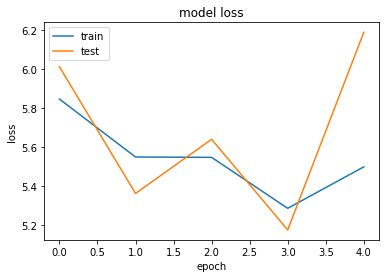

In [ ]:
# summarize history for loss
plt.plot(history_effnet_B4_Pass_2_images.history['loss'])
plt.plot(history_effnet_B4_Pass_2_images.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### The below code is run on Kaggle server

In [ ]:
## The below code is run on Kaggle server
history_effnet_B4_Pass_2_images = model_effnet_B4.fit_generator(IGenerator(keys=tr_p, 
                               a = A, 
                               tab = TAB), 
                    steps_per_epoch = 200,
                    validation_data=IGenerator(keys=vl_p, 
                               a = A, 
                               tab = TAB),
                    validation_steps = 20, 
                    callbacks = my_callbacks, 
                    epochs=40)

In [ ]:
# summarize history for loss
plt.plot(history_effnet_B4_Pass_2_images.history['loss'])
plt.plot(history_effnet_B4_Pass_2_images.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

![alt text](loss_parallel.PNG "Model loss")

Validation loss which run on kaggle has been taken i.e. 5.02581